In [74]:
import matplotlib.pyplot as plt

from PIL import Image
import numpy as np
import pandas as pd
import shutil, os, glob

In [2]:
dataPath = "../../data/statefarm/"

In [3]:
# number of test images
!ls {dataPath}test -1 | wc -l

79726


In [6]:
# number of train images (total across classes)
!find {dataPath}train -type f | wc -l

22424


In [5]:
# train images in each class
cats = ["c0", "c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9"]
for cat in cats:
    !ls {dataPath}train/{cat} -1 | wc -l

2489
2267
2317
2346
2326
2312
2325
2002
1911
2129


In [9]:
fnames[:5]

['img_100026.jpg',
 'img_10003.jpg',
 'img_100050.jpg',
 'img_100074.jpg',
 'img_10012.jpg']

In [3]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [55]:
# view example files in each category
cat = "c5/"
fnames = !ls {dataPath}train/{cat}
imgs = [np.array(PIL.Image.open(dataPath + "train/" + cat + fnames[i])) for i in range(4)]
titles = [img.shape for img in imgs]

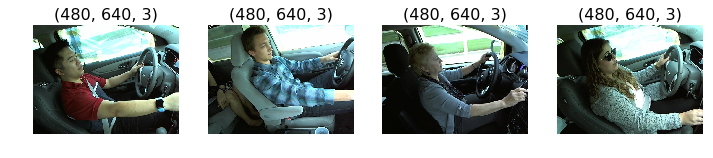

In [56]:
plots(imgs, titles = titles)

In [6]:
drivers = pd.read_csv(dataPath + "driver_imgs_list.csv")

In [10]:
drivers.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [13]:
# number of drivers in dataset
drivers["subject"].value_counts().count()

26

In [16]:
pd.pivot_table(drivers, index = "subject", columns = "classname", aggfunc = np.size, margins = True)

img                                                             
classname    c0    c1    c2    c3    c4    c5    c6    c7    c8    c9    All
subject                                                                     
p002         76    74    86    79    84    76    83    72    44    51    725
p012         84    95    91    89    97    96    75    72    62    62    823
p014        100   103   100   100   103   102   101    77    38    52    876
p015         79    85    88    94   101   101    99    81    86    61    875
p016        111   102   101   128   104   104   108   101    99   120   1078
p021        135   131   127   128   132   130   126    98    99   131   1237
p022        129   129   128   129   130   130   131    98    98   131   1233
p024        130   129   128   130   129   131   129   101    99   120   1226
p026        130   129   130   131   126   130   128    97    97    98   1196
p035         94    81    88    89    89    89    94    87    56    81    848
p039         65    63    70    65    62    64    63    64    70    65    651
p041         60    64    60    60    60    61    61    61    59    59    605
p042         59    59    60    59    58    59    59    59    59    60    591
p045         75    75    76    75    75    76    71    67    66    68    724
p047         80    91    81    86    82    87    81    82    82    83    835
p049         84    85   119   110   109   116   119    74    79   116   1011
p050        123    45    52    98    83    91    82    81    65    70    790
p051        182    81    81    83    81    83    95    80    62    92    920
p052         72    71    84    75    72    72    77    71    71    75    740
p056         81    80    80    78    82    81    80    74    83    75    794
p061         84    81    81    83    79    81    80    79    81    80    809
p064         83    81    83    84    86    85    82    79    81    76    820
p066        129   100   106   101   102   101   105    86   114    90   1034
p072         63    62    36    31    34     6    35     2    21    56    346
p075         81    81    85    79    89    79    82    82    79    77    814
p081        100    90    96    82    77    81    79    77    61    80    823
All        2489  2267  2317  2346  2326  2312  2325  2002  1911  2129  22424

In [18]:
# pick drivers in train and validation set
driverlist = drivers["subject"].unique()

In [24]:
val_drivers = driverlist[np.random.choice(len(driverlist), size = int(0.5*len(driverlist)), replace = False)]

In [26]:
trn_drivers = np.setdiff1d(driverlist, val_drivers)

In [27]:
trn_drivers, val_drivers

(array(['p002', 'p012', 'p014', 'p026', 'p039', 'p045', 'p047', 'p049',
        'p050', 'p051', 'p066', 'p072', 'p081'], dtype=object),
 array(['p035', 'p056', 'p061', 'p015', 'p064', 'p022', 'p021', 'p075',
        'p042', 'p041', 'p052', 'p016', 'p024'], dtype=object))

In [36]:
# pick files in train and validation set for each class
val_drivers_df = drivers[drivers["subject"].isin(val_drivers)]

In [37]:
assert set(val_drivers_df["subject"].unique()) == set(val_drivers)

In [47]:
trnPath = dataPath + "train/"
valPath = dataPath + "valid/"

In [50]:
if not os.path.exists(valPath):
    os.makedirs(valPath)

In [53]:
cats = ["c0", "c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9"]

In [56]:
for cat in cats:
    valPathcat = valPath + cat + "/"
    print(valPathcat)
    if not os.path.exists(valPathcat):
        os.makedirs(valPathcat)

../../data/statefarm/valid/c0/
../../data/statefarm/valid/c1/
../../data/statefarm/valid/c2/
../../data/statefarm/valid/c3/
../../data/statefarm/valid/c4/
../../data/statefarm/valid/c5/
../../data/statefarm/valid/c6/
../../data/statefarm/valid/c7/
../../data/statefarm/valid/c8/
../../data/statefarm/valid/c9/


In [57]:
for cat in cats:
    val_drivers_dffilt = val_drivers_df[val_drivers_df["classname"] == cat]
    print(val_drivers_dffilt.shape[0])
    val_fnames = val_drivers_dffilt["img"].values
    for f in val_fnames:
        shutil.move(trnPath + cat + "/" + f, valPath + cat + "/" + f)

1198
1174
1193
1216
1211
1203
1208
1071
1050
1146


In [59]:
for cat in cats:
    !ls {dataPath}valid/{cat} -1 | wc -l

1198
1174
1193
1216
1211
1203
1208
1071
1050
1146


In [60]:
for cat in cats:
    !ls {dataPath}train/{cat} -1 | wc -l

1291
1093
1124
1130
1115
1109
1117
931
861
983


In [70]:
# create directories for holding sample of data
sampPath = "../../data/statefarm/sample/"
sampTrnPath = "../../data/statefarm/sample/train/"
sampValPath = "../../data/statefarm/sample/valid/"

sampTrnPathcat = [sampTrnPath + cat + "/" for cat in cats]
sampValPathcat = [sampValPath + cat + "/" for cat in cats]

In [71]:
newdirlist = [sampPath, sampTrnPath, sampValPath] + sampTrnPathcat + sampValPathcat
newdirlist

['../../data/statefarm/sample/',
 '../../data/statefarm/sample/train/',
 '../../data/statefarm/sample/valid/',
 '../../data/statefarm/sample/train/c0/',
 '../../data/statefarm/sample/train/c1/',
 '../../data/statefarm/sample/train/c2/',
 '../../data/statefarm/sample/train/c3/',
 '../../data/statefarm/sample/train/c4/',
 '../../data/statefarm/sample/train/c5/',
 '../../data/statefarm/sample/train/c6/',
 '../../data/statefarm/sample/train/c7/',
 '../../data/statefarm/sample/train/c8/',
 '../../data/statefarm/sample/train/c9/',
 '../../data/statefarm/sample/valid/c0/',
 '../../data/statefarm/sample/valid/c1/',
 '../../data/statefarm/sample/valid/c2/',
 '../../data/statefarm/sample/valid/c3/',
 '../../data/statefarm/sample/valid/c4/',
 '../../data/statefarm/sample/valid/c5/',
 '../../data/statefarm/sample/valid/c6/',
 '../../data/statefarm/sample/valid/c7/',
 '../../data/statefarm/sample/valid/c8/',
 '../../data/statefarm/sample/valid/c9/']

In [73]:
for newdir in newdirlist:
    if not os.path.exists(newdir):
        os.makedirs(newdir)

In [83]:
for cat in cats:
    flist = glob.glob(trnPath + cat + "/*.jpg")
    flist_shuff = np.random.permutation(flist)[:100]
    for f in flist_shuff:
        shutil.copy(f, sampTrnPath + cat + "/")

In [84]:
for cat in cats:
    flist = glob.glob(valPath + cat + "/*.jpg")
    flist_shuff = np.random.permutation(flist)[:100]
    for f in flist_shuff:
        shutil.copy(f, sampValPath + cat + "/")

In [87]:
for cat in cats:
    !ls {sampTrnPath}{cat}/ -1 | wc -l
    !ls {sampValPath}{cat}/ -1 | wc -l
    print(" ")

100
100
 
100
100
 
100
100
 
100
100
 
100
100
 
100
100
 
100
100
 
100
100
 
100
100
 
100
100
 
